In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.ensemble import RandomForestRegressor

c:\Users\madis\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ideas:

 - PCA and plotting of principal components
 - feature importance on a simple random forest to indicate if there are main informative features or well distributed
 - pairwise plots (correlation btwn features)
 


In [3]:
X = np.load('fingerprints.npy')
X = pd.DataFrame(X)
y = np.load('logd74s.npy')
y = pd.DataFrame(y)
y = y[0]
X

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pairplot of features to show correlation

In [ ]:
#do not do this because there are 2000 features

PCA and visualization of 1st 2 principal components

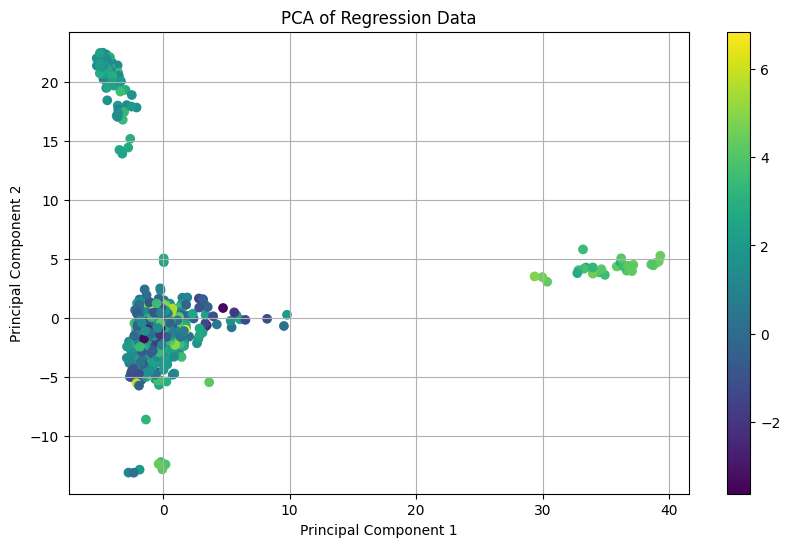

In [3]:
#scale X to make PCA better
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca
pca = PCA(n_components=2) 
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, y], axis=1)

#plot and color points based on y
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=y, cmap='viridis')
plt.title('PCA of Regression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.grid(True)
plt.show()

feature importance

In [ ]:
#issue running due to number of features I think

Correlation

In [ ]:
#this is also a bad idea to run because there are 2000

In [6]:
correlation_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Distribution of y

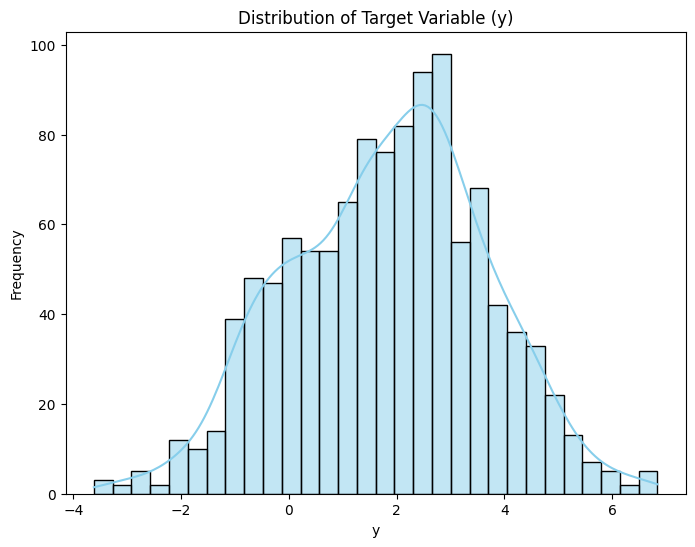

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()